# Why AI Can't Teach Well
## In the Pursuit of More Optimal Ways to Explain Things

---

### I) Introduction
This cell presents an example of an AI explanation of **FFT (Fast Fourier Transform)**.  

> These results are generated using **the free version of ChatGPT (gpt-5o-mini)**.

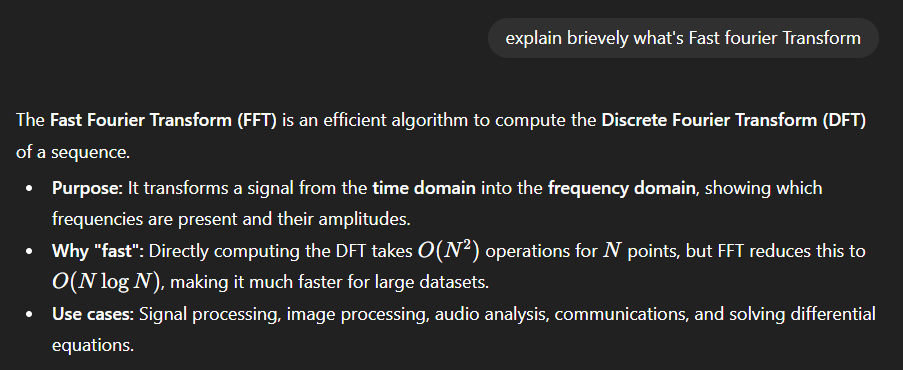

From the screenshot, it is evident that AI explanations can sometimes be suboptimal. Observed issues include:

- Use of terms like $O(N)$ `complexity` without clarifying if the user understands **Big-O notation**.
- Explanations are often **unintuitive** and **not concise** for a brief explanation.
- The explanation begins with a **definition** rather than a **problem-oriented approach**.
- Lacks **interactivity** that could engage the learner more effectively.

**Question:**  
If AI had the capability to provide **animated, problem-based explanations**, would the learning experience improve?

---

### II) Premise
The premise of this project is to **analyze and collect data for eventual AI training**.  

- The dataset focuses on content from **popular YouTube channels and websites** that specialize in explaining **complex topics**.
- These sources have established **reputation and high engagement**, providing a model for effective teaching strategies.
- The goal is to analyze **language use, phrasing, and problem framing** to inform **future AI fine-tuning**.
